## 2022-1학기 21720893 손명균

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
	      padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 batch_size=128, epochs=10, verbose=1, 
                 validation_data=(x_test, y_test))
print("\nTraining time = ", datetime.now() - start_time) 

Epoch 1/10
469/469 [==============================] - 16s 7ms/step - loss: 0.2294 - accuracy: 0.9322 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0354 - val_accuracy: 0.9880
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0357 - val_accuracy: 0.9872
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0273 - val_accuracy: 0.9915
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0292 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026855304837226868
Test accuracy: 0.9922999739646912


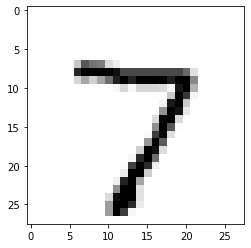

The Answer is  7


In [ ]:
t = 0    # t번째 테스트 이미지
plt.imshow(x_test[t].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model.predict(x_test[t:t+1])))

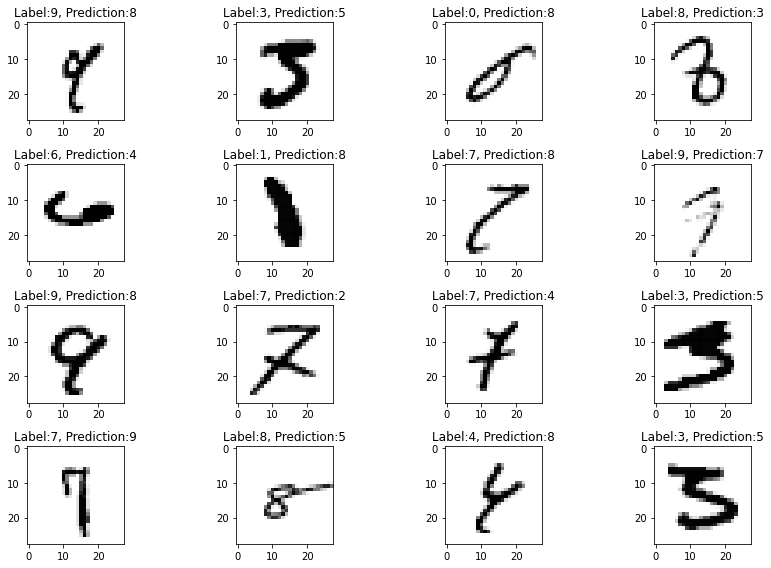

In [ ]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = np.random.choice(wrong_result, 16,  replace=False)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu')) #, padding='same'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(1000,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 1000)             

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = datetime.now()

hist = model2.fit(x_train, y_train,
                 batch_size=128, epochs=10, verbose=1, 
                 validation_data=(x_test, y_test))
print("\nTraining time = ", datetime.now() - start_time) 

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1780 - accuracy: 0.9460 - val_loss: 0.0512 - val_accuracy: 0.9824
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0269 - val_accuracy: 0.9912
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0345 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0229 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0296 - val_accuracy: 0.9896
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0263 - val_accuracy: 0.9921
Epoch 

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030366959050297737
Test accuracy: 0.9908000230789185


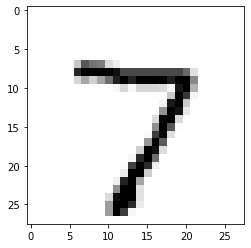

The Answer is  7


In [ ]:
t = 0    # t번째 테스트 이미지
plt.imshow(x_test[t].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', np.argmax(model2.predict(x_test[t:t+1])))

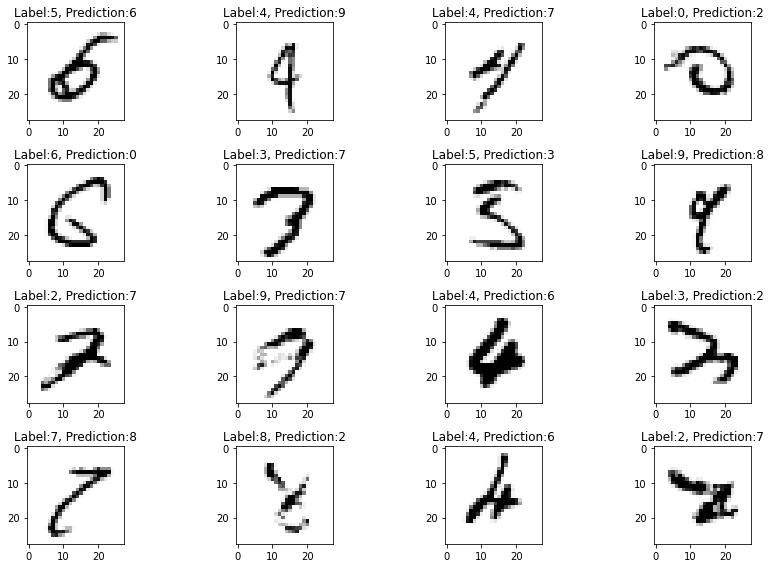

In [ ]:
predicted_result = model2.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
test_labels = np.argmax(y_test, axis=1)

wrong_result = []
for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = np.random.choice(wrong_result, 16,  replace=False)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()